<a href="https://colab.research.google.com/github/Gamearonx/Pre-Boot-Camp-2/blob/main/Decision_Tree_Emails.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
# 1. Setup and Data Preparation
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load the dataset
data = pd.read_csv('emails.csv')

# Display basic info
print("First 5 rows of data:")
print(data.head())
print("\nDataset Info:")
print(data.info())

First 5 rows of data:
  Email No.  the  to  ect  and  for  of    a  you  hou  ...  connevey  jay  \
0   Email 1    0   0    1    0    0   0    2    0    0  ...         0    0   
1   Email 2    8  13   24    6    6   2  102    1   27  ...         0    0   
2   Email 3    0   0    1    0    0   0    8    0    0  ...         0    0   
3   Email 4    0   5   22    0    5   1   51    2   10  ...         0    0   
4   Email 5    7   6   17    1    5   2   57    0    9  ...         0    0   

   valued  lay  infrastructure  military  allowing  ff  dry  Prediction  
0       0    0               0         0         0   0    0           0  
1       0    0               0         0         0   1    0           0  
2       0    0               0         0         0   0    0           0  
3       0    0               0         0         0   0    0           0  
4       0    0               0         0         0   1    0           0  

[5 rows x 3002 columns]

Dataset Info:
<class 'pandas.core.frame


Column names in the dataset:
['Email No.', 'the', 'to', 'ect', 'and', 'for', 'of', 'a', 'you', 'hou', 'in', 'on', 'is', 'this', 'enron', 'i', 'be', 'that', 'will', 'have', 'with', 'your', 'at', 'we', 's', 'are', 'it', 'by', 'com', 'as', 'from', 'gas', 'or', 'not', 'me', 'deal', 'if', 'meter', 'hpl', 'please', 're', 'e', 'any', 'our', 'corp', 'can', 'd', 'all', 'has', 'was', 'know', 'need', 'an', 'forwarded', 'new', 't', 'may', 'up', 'j', 'mmbtu', 'should', 'do', 'am', 'get', 'out', 'see', 'no', 'there', 'price', 'daren', 'but', 'been', 'company', 'l', 'these', 'let', 'so', 'would', 'm', 'into', 'xls', 'farmer', 'attached', 'us', 'information', 'they', 'message', 'day', 'time', 'my', 'one', 'what', 'only', 'http', 'th', 'volume', 'mail', 'contract', 'which', 'month', 'more', 'robert', 'sitara', 'about', 'texas', 'nom', 'energy', 'pec', 'questions', 'www', 'deals', 'volumes', 'pm', 'ena', 'now', 'their', 'file', 'some', 'email', 'just', 'also', 'call', 'change', 'other', 'here', 'like',

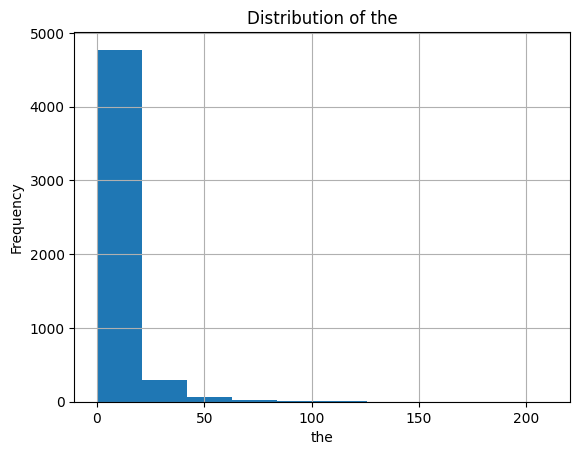

In [20]:
# 2. Data Exploration
print("\nColumn names in the dataset:")
print(data.columns.tolist())

# Automatically pick a numeric column (not the target) to plot
numeric_cols = data.select_dtypes(include='number').columns.tolist()
sample_col = [col for col in numeric_cols if col.lower() != 'spam'][0]

# Plot histogram of a numeric feature
data[sample_col].hist()
plt.title(f'Distribution of {sample_col}')
plt.xlabel(sample_col)
plt.ylabel('Frequency')
plt.show()

In [22]:
# 3. Preprocessing
print("\nMissing values:")
print(data.isnull().sum())

# Separate features and target
target_col = 'spam'
X = data.drop(columns=[target_col])
y = data[target_col]

# Drop non-numeric columns (like IDs or text)
non_numeric_cols = X.select_dtypes(exclude='number').columns.tolist()
print("Dropping non-numeric columns:", non_numeric_cols)
X = X.drop(columns=non_numeric_cols)


Missing values:
Email No.     0
the           0
to            0
ect           0
and           0
             ..
military      0
allowing      0
ff            0
dry           0
Prediction    0
Length: 3002, dtype: int64
Dropping non-numeric columns: ['Email No.']


In [23]:
# 4. Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [24]:
# 5. Decision Tree Construction
model = DecisionTreeClassifier(max_depth=5, random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [25]:
# 6. Model Evaluation
y_pred = model.predict(X_test)

print("\nModel Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))



Model Evaluation:
Accuracy: 0.9942010309278351
Precision: 0.9933040202929804
Recall: 0.9942010309278351
F1 Score: 0.9934306582323953


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


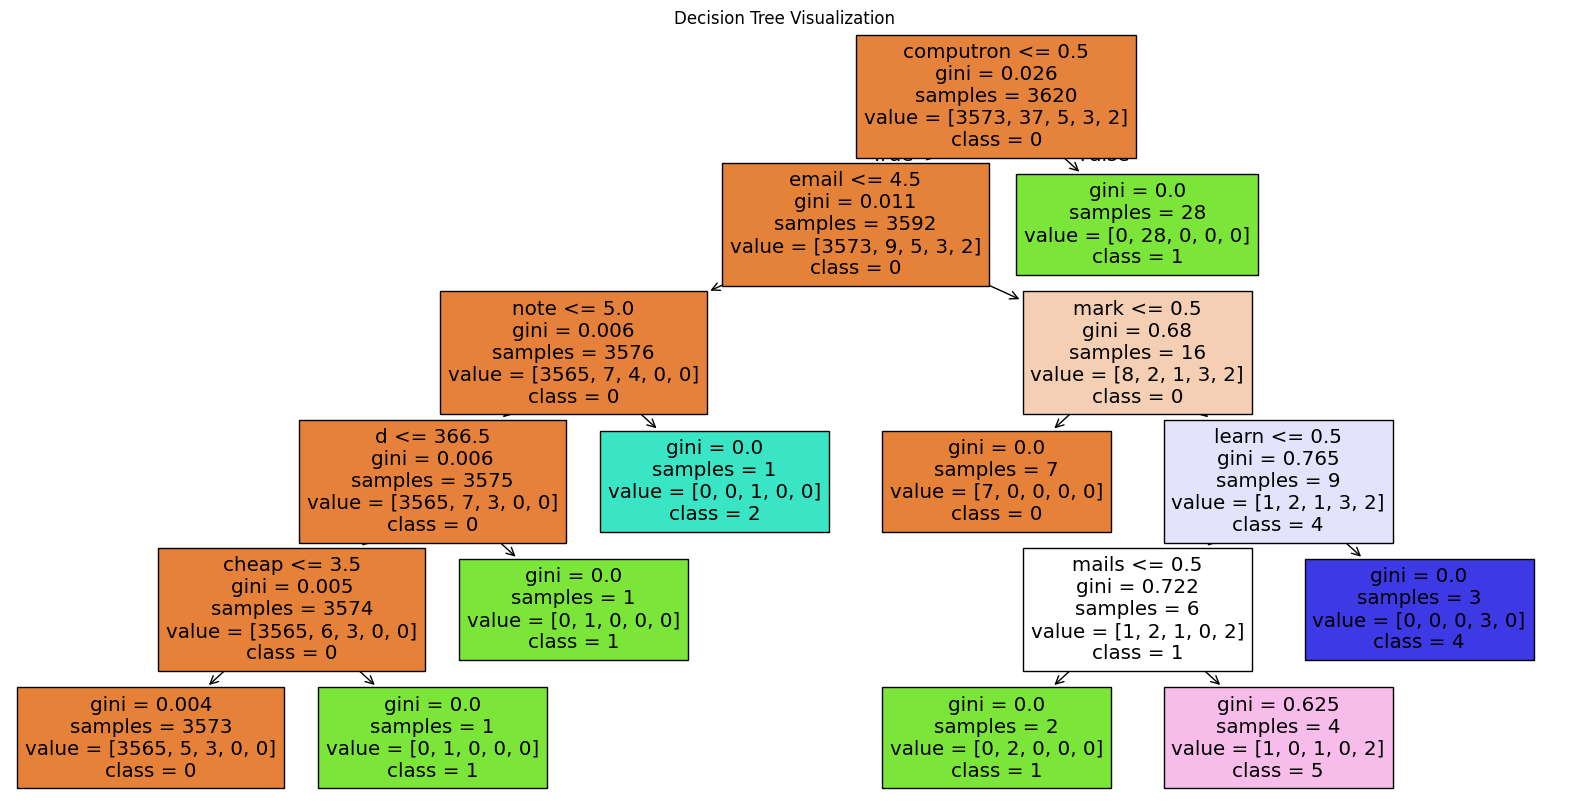

In [26]:
# 7. Visualize the Decision Tree
plt.figure(figsize=(20,10))
plot_tree(model, feature_names=X.columns, class_names=[str(cls) for cls in model.classes_], filled=True)
plt.title("Decision Tree Visualization")
plt.show()

In [27]:
# 8. Hyperparameter Tuning
param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_leaf': [1, 3, 5],
    'criterion': ['gini', 'entropy']
}

grid = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

print("\nBest parameters from Grid Search:")
print(grid.best_params_)

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(



Best parameters from Grid Search:
{'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 5}


In [28]:
# Cross-validation score of the best model
best_model = grid.best_estimator_
cv_scores = cross_val_score(best_model, X, y, cv=5)

print("\nCross-validation accuracy scores:", cv_scores)
print("Mean CV accuracy:", cv_scores.mean())

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(



Cross-validation accuracy scores: [0.9884058  0.99710145 0.99226306 0.99806576 0.99323017]
Mean CV accuracy: 0.9938132481148209
